In [1]:
#simple linear regession dataset

import pandas as pd

bola = {'diameter' : [6,8,10,14,18],
       'harga' : [7,9,13,17.5,20]}

bola_df = pd.DataFrame(bola)
bola_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,20.0


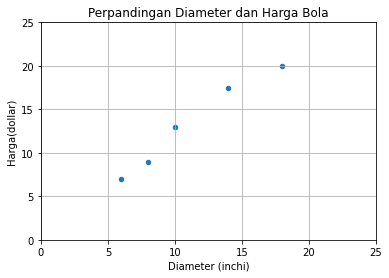

In [2]:
import matplotlib.pyplot as plt

bola_df.plot(kind='scatter',x='diameter',y='harga')

plt.title('Perpandingan Diameter dan Harga Bola')
plt.xlabel('Diameter (inchi)')
plt.ylabel('Harga(dollar)')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

In [4]:
#model simple linier regression

#1.penyesuaian dataset

import numpy as np

x = np.array(bola_df['diameter'])
y = np.array(bola_df['harga'])

print(f'x : {x}')
print(f'y : {y}')

x : [ 6  8 10 14 18]
y : [ 7.   9.  13.  17.5 20. ]


In [5]:
X = x.reshape(-1,1)
X.shape

(5, 1)

In [6]:
X

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]], dtype=int64)

In [8]:
#training simple linier regression model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [9]:
#visualisasi simple linear regression model

X_vis = np.array([0,25]).reshape(-1,1)
y_vis = model.predict(X_vis)

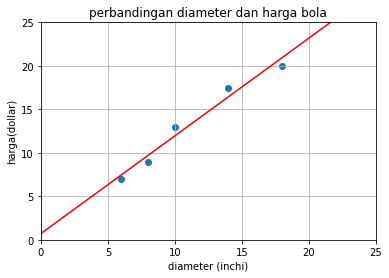

In [10]:
plt.scatter(X,y)
plt.plot(X_vis, y_vis, '-r')

plt.title('perbandingan diameter dan harga bola')
plt.xlabel('diameter (inchi)')
plt.ylabel('harga(dollar)')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid()
plt.show()

In [11]:
print(f'intercept : {model.intercept_}')
print(f'slope : {model.coef_}')

intercept : 0.7241379310344875
slope : [1.12284483]


In [12]:
#mencari nilai slope

print(f'X:\n{X}\n')
print(f'X flatten: {X.flatten()}\n')
print(f'y:{y}')

X:
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

X flatten: [ 6  8 10 14 18]

y:[ 7.   9.  13.  17.5 20. ]


In [13]:
#variance

variance_x = np.var(X.flatten(), ddof=1)

print(f'variance: {variance_x}')

variance: 23.2


In [14]:
#covariance

np.cov(X.flatten(),y)

array([[23.2 , 26.05],
       [26.05, 30.2 ]])

In [15]:
covariance_xy = np.cov(X.flatten(),y)[0][1]

print(f'covariance: {covariance_xy}')

covariance: 26.05


In [16]:
#nilai slope

slope = covariance_xy / variance_x

print(f'slope: {slope}')

slope: 1.1228448275862069


In [17]:
#mencari nilai intercept

intercept = np.mean(y) - slope * np.mean(X)
print(f'intercept:{intercept}')

intercept:0.724137931034484


In [19]:
#prediksi harga bola berdsarkan ukuran diameter

diameter_bola = np.array([7,13,15]).reshape(-1,1)
diameter_bola

array([[ 7],
       [13],
       [15]])

In [20]:
prediksi_harga = model.predict(diameter_bola)
prediksi_harga

array([ 8.58405172, 15.32112069, 17.56681034])

In [21]:
for dmtr, hrg in zip(diameter_bola, prediksi_harga):
    print(f'Diameter:{dmtr} prediksi harga: {hrg}')

Diameter:[7] prediksi harga: 8.584051724137934
Diameter:[13] prediksi harga: 15.321120689655174
Diameter:[15] prediksi harga: 17.566810344827587


In [22]:
#evaluasi simple linear regression model training dan testing  dataset

X_train = np.array([6,8,10,14,18]).reshape(-1,1)
y_train = np.array([7,9,13,17.5,20])

X_test = np.array([8,9,11,16,12]).reshape(-1,1)
y_test = np.array([11,8.5,15,18,11])

In [23]:
#training simple linear regression model

model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [25]:
#evaluasi linear regression model dengan coefficient of determination atau R-squared

from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

R-squared: 0.6213315163349296
